In [43]:
import pandas as pd
import tensorflow as tf
import os.path
from sklearn.preprocessing import OneHotEncoder

In [44]:
# column_names = ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
column_names = ['district', 'rps03', 'rps09', 'rps11', 'rps15', 'rps16', 'rps17', 'rps18', 'rps28', 'rps30', 'rps31','rps21']
replace_column_names = ['district', 'land_area', 'floors', 'building_type', 'building_area', 'room', 'hall', 'bathroom', 'main_building_area', 'balcony_area', 'elevator','total_price']


In [45]:
# Get the current directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)
# Define the file path
data_file_path = os.path.join(parent_directory, 'data\不動產實價登錄資訊.csv')
df = pd.read_csv(data_file_path)
# filter out rps01(交易標的): 只保留有包含「房地」的
df = df[df['rps01'].str.contains('房地')]
# filter out rps11(建物型態 ): 只保留不包含「其他」的
df = df[~df['rps11'].str.contains('其他')]
# filter out rps12(主要用途): 只保留包含「住家用」的
df = df[df['rps12'].str.contains('住家用', na=False)]

# leave only rps22(單價平方公尺)
df_price = df['rps21']

df = df[column_names]

'''Remain columns before factorize'''
# # factorize district
# df['district_fac'] = pd.factorize(df['district'])[0]
# # factorize floors
# df['floors_fac'] = pd.factorize(df['rps09'])[0]
# # factorize building_type
# df['rbuilding_type_fac'] = pd.factorize(df['rps11'])[0]
# # factorize elevator
# df['elevator_fac'] = pd.factorize(df['rps31'])[0]

# # Replace column names to Engilsh
# df.columns = replace_column_names+['district_fac', 'floors_fac', 'building_type_fac', 'elevator_fac']

# # replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
# df_data = pd.DataFrame(df, columns=replace_column_names+['district_fac','floors_fac','building_type_fac','elevator_fac'])

'''Leave only columns after factorize'''
# factorize district
df['district'] = pd.factorize(df['district'])[0]
# factorize floors
df['rps09'] = pd.factorize(df['rps09'])[0]
# factorize building_type
df['rps11'] = pd.factorize(df['rps11'])[0]
# factorize elevator
df['rps31'] = pd.factorize(df['rps31'])[0]

# Replace column names to Engilsh
df.columns = replace_column_names

# replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
df_data = pd.DataFrame(df, columns=replace_column_names)
df_data



,district,land_area,floors,building_type,building_area,room,hall,bathroom,main_building_area,balcony_area,elevator,total_price
0,0,3.82,0,0,29.83,1,1,1,21.74,3.41,0,3550000
5,1,5.96,1,0,77.86,2,1,1,30.70,10.73,0,12800000
7,2,16.94,2,0,42.58,0,0,0,32.38,3.92,0,1700000
16,0,21.03,3,0,114.11,3,2,2,74.47,7.82,0,12500000
17,3,31.98,4,1,149.96,3,2,2,44.48,3.28,0,18000000
...,...,...,...,...,...,...,...,...,...,...,...,...
64183,15,8.46,28,0,57.27,1,0,1,33.04,2.94,0,9530000
64184,1,12.84,3,0,163.82,3,2,2,78.79,8.07,0,22680000
64185,1,19.90,11,0,237.99,3,2,3,124.42,12.69,0,34500000
64186,1,20.81,28,0,268.68,3,2,3,124.42,12.69,0,35580000


In [46]:
'''One hot encoding'''
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the 'district' and 'building_type' columns
# encoded_features = encoder.fit_transform(df_data[['district', 'building_type']])

# # Convert the sparse matrix to a DataFrame and set the column names
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['district', 'building_type']))

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# df_data = pd.concat([df_data.drop(['district', 'building_type'], axis=1), encoded_df], axis=1)
# df_data

'One hot encoding'

In [47]:
df_data.isnull().any()

district              False
land_area             False
floors                False
building_type         False
building_area         False
room                  False
hall                  False
bathroom              False
main_building_area    False
balcony_area          False
elevator              False
total_price           False
dtype: bool

In [48]:
'''Remove One hot encoded columns'''
# columns_to_drop = ['district', 'floors', 'building_type', 'elevator']
# columns_to_drop = [col for col in columns_to_drop if col in df_data.columns]
# df_data = df_data.drop(columns=columns_to_drop)
# df_data

'Remove One hot encoded columns'

In [49]:

corr_matrix = df_data.corr(method="pearson")
corr_matrix


,district,land_area,floors,building_type,building_area,room,hall,bathroom,main_building_area,balcony_area,elevator,total_price
district,1.000000,0.031955,0.004255,-0.045275,0.059793,0.004645,0.027240,0.020076,0.031657,0.061582,-0.079364,-0.143695
land_area,0.031955,1.000000,0.009771,0.276789,0.371421,0.171411,0.125217,0.159179,0.513660,0.225313,0.173591,0.275565
floors,0.004255,0.009771,1.000000,-0.081278,0.114704,-0.011579,-0.007743,0.010879,0.104601,0.004254,-0.035229,0.124004
building_type,-0.045275,0.276789,-0.081278,1.000000,-0.198261,0.241936,0.044055,0.120858,0.248767,-0.112118,0.909937,-0.242800
building_area,0.059793,0.371421,0.114704,-0.198261,1.000000,0.343191,0.289258,0.346186,0.810853,0.631193,-0.256639,0.788594
room,0.004645,0.171411,-0.011579,0.241936,0.343191,1.000000,0.428123,0.599169,0.460955,0.256941,0.220157,0.216338
hall,0.027240,0.125217,-0.007743,0.044055,0.289258,0.428123,1.000000,0.209947,0.295683,0.209994,0.023668,0.207264
bathroom,0.020076,0.159179,0.010879,0.120858,0.346186,0.599169,0.209947,1.000000,0.399710,0.245868,0.077514,0.247502
main_building_area,0.031657,0.513660,0.104601,0.248767,0.810853,0.460955,0.295683,0.399710,1.000000,0.540262,0.171891,0.598336
balcony_area,0.061582,0.225313,0.004254,-0.112118,0.631193,0.256941,0.209994,0.245868,0.540262,1.000000,-0.168344,0.463742


In [50]:
corr_matrix['total_price'].sort_values(ascending=False)

total_price           1.000000
building_area         0.788594
main_building_area    0.598336
balcony_area          0.463742
land_area             0.275565
bathroom              0.247502
room                  0.216338
hall                  0.207264
floors                0.124004
district             -0.143695
building_type        -0.242800
elevator             -0.266411
Name: total_price, dtype: float64

Saving figure Correlation_plot (total_price)


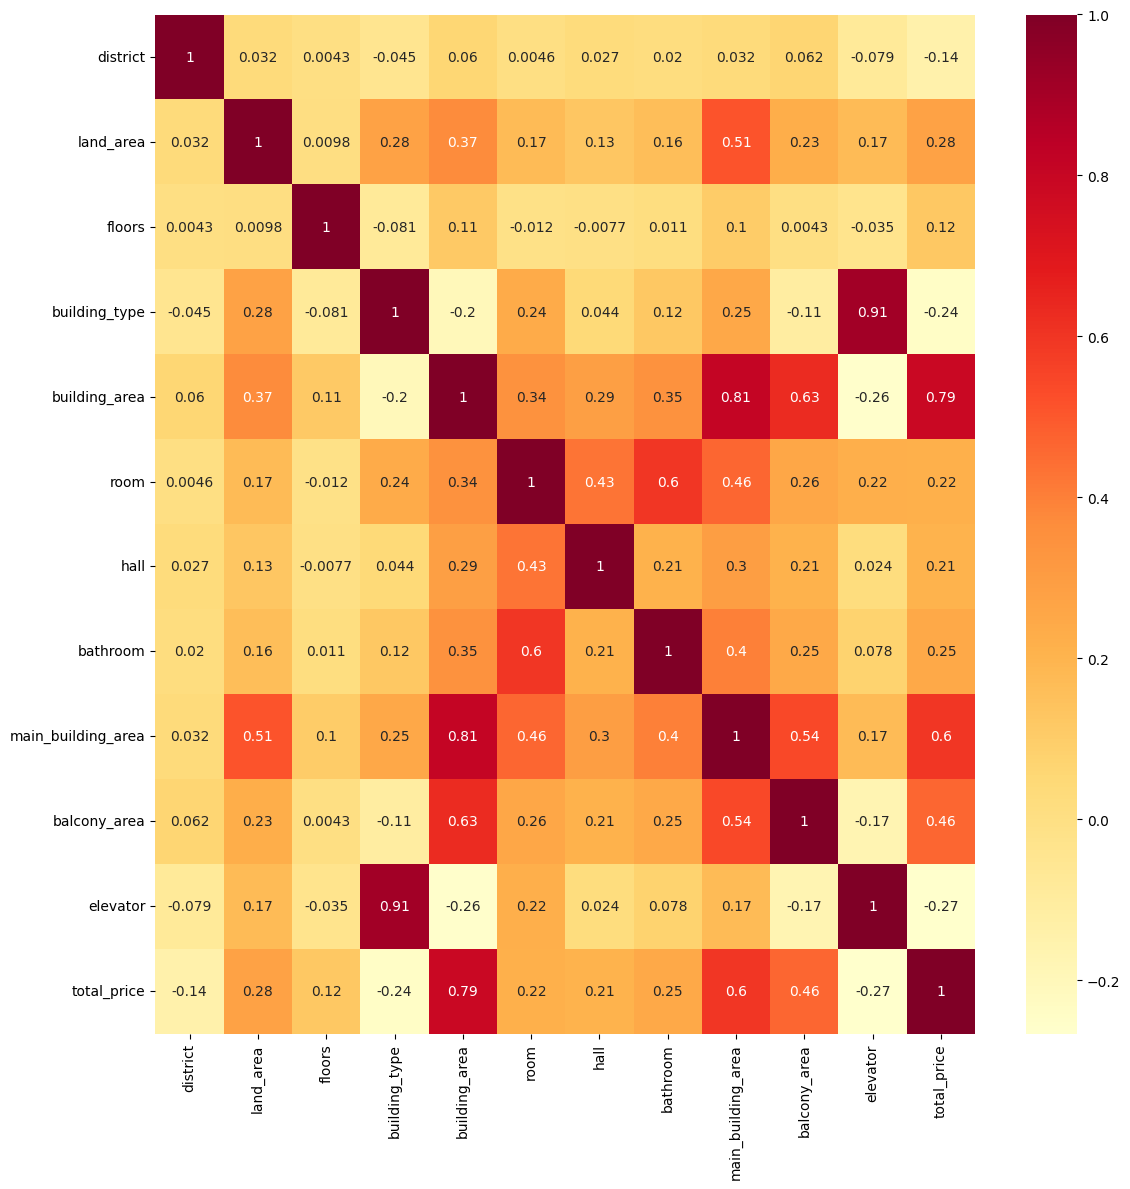

In [51]:
import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot

# Where to save the figures
PROJECT_ROOT_DIR = parent_directory
PLOT_IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Image", 'Plot')
os.makedirs(PLOT_IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(PLOT_IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.figure(figsize= (len(df.columns), len(df.columns))) # 圖形大小
sns.heatmap(df_data.corr(),annot = True,cmap='YlOrRd') # 塗顏色
save_fig("Correlation_plot (total_price)") # 儲存圖形
plt.show() # 顯示圖形

[-308872.89366387   -7914.91253964   13231.80085471 -794502.7633911
  119327.36479458 -303867.37051532  123014.48723118  139520.43995991
   -4838.60716696  -65660.82084414  292139.30374697]
Saving figure LinearRegression_predict_vs_actual (total_price)


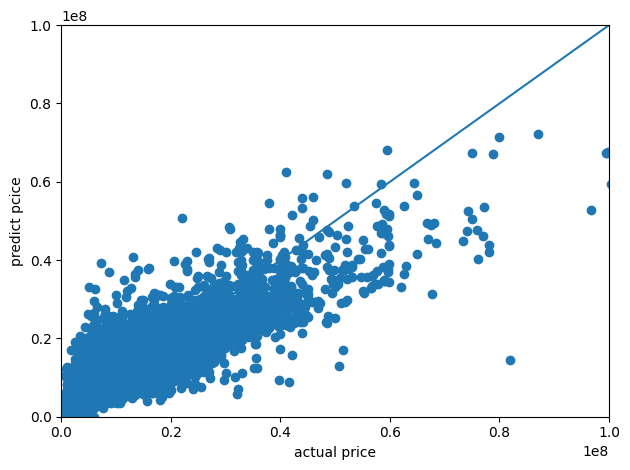

In [52]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = df.drop("total_price", axis = 1) # 13個特徵的數據
# print(x)
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # 將資料拿去訓練
print(lin_reg.coef_) # 顯示係數

y_predict = lin_reg.predict(x_test) # 北test的資料用訓練出來的模型去預測

# y_test = scaler.inverse_transform(y_test)
# y_predict_inverse = scaler.inverse_transform(y_predict)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 100000000) # x軸的範圍
plt.ylim(0, 100000000) # y軸的範圍
plt.plot([0,100000000], [0,100000000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("LinearRegression_predict_vs_actual (total_price)") # 儲存圖形
plt.show() # 察看結果

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

'''Compute Model's error'''
housing_predictions = lin_reg.predict(x_test)
lin_rmse = mean_squared_error(y_test, housing_predictions,squared=False)
print('Linear regression RMSE:',lin_rmse)
mean = np.mean(np.abs(y_test - housing_predictions))
print("Linear regression MAE: {}".format(mean))

Linear regression RMSE: 5683545.844878261
Linear regression MAE: 3610047.4886125005


In [54]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'LinearRegression (total_price).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(lin_reg,Model_path)

['c:\\Users\\jgw09\\School\\NTUST_IM\\Junior_Second\\AI\\Final_Project\\housePricePredict\\Model\\LinearRegression (total_price).pkl']

In [55]:
lin_reg.score(x_train, y_train) # 訓練模型的正確率

0.6831120394811377

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df_price_normalized = pd.DataFrame(scaler.fit_transform(df_price.to_numpy().reshape(-1, 1)))

In [57]:
df_price_normalized

,0
0,-1.149103
1,-0.153915
2,-1.348141
3,-0.186192
4,0.405541
...,...
45278,-0.505728
45279,0.909053
45280,2.180741
45281,2.296936


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = df.drop("total_price", axis = 1) # 13個特徵的數據
y = df_price_normalized # 房價數據
# y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

input_dim = 11

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, input_dim=input_dim, activation='relu'))

# Add another hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add an output layer with 1 neuron (for regression)
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Neural Network (total_price).h5'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

# Train the model
if os.path.exists(Model_path):
    model = tf.keras.models.load_model(Model_path)
else:
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    # Save Model
    model.save(Model_path)


# Make predictions
y_predict = model.predict(x_test)

C:\Users\jgw09\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Saving figure neural_network_predict_vs_actual (total_price)


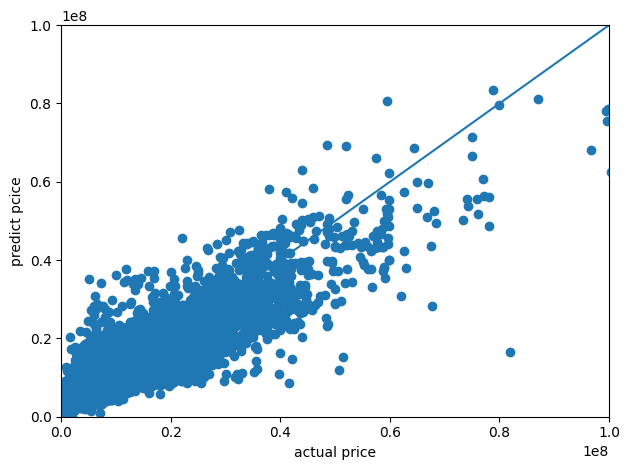

In [59]:
'''Plot NN prediction vs actual'''
y_predict_inverse = scaler.inverse_transform(y_predict)
y_test_inverse = scaler.inverse_transform(y_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 100000000) # x軸的範圍
plt.ylim(0, 100000000) # y軸的範圍
plt.plot([0,100000000], [0,100000000]) # 劃一條基準線
plt.scatter(y_test_inverse, y_predict_inverse) # 比對預測跟實際的差別
save_fig("neural_network_predict_vs_actual (total_price)") # 儲存圖形
plt.show() # 察看結果

In [60]:
y_predict_inverse = scaler.inverse_transform(y_predict)

In [61]:
import numpy as np

'''Compute Model's error'''
nn_rmse = mean_squared_error(y_test_inverse, y_predict_inverse,squared=False)
print('Neural Network RMSE:',nn_rmse)
nn_mean = np.mean(np.abs(y_test_inverse - y_predict_inverse))
print("Neural Network MAE: {}".format(nn_mean))

Neural Network RMSE: 5204485.549106745
Neural Network MAE: 3357780.0866451394


In [62]:
'''Convert total_price error to average price per building area error'''
average_price_mean = nn_mean/x_test['building_area'].mean()
average_price_mean

27540.014623430357

Saving figure DecisionTree_predict_vs_actual (total_price)


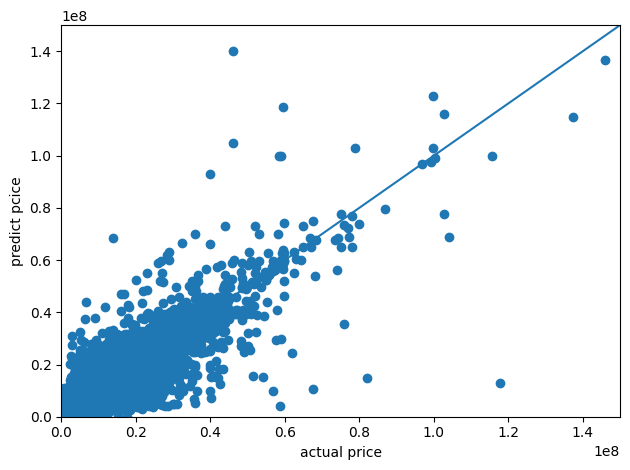

In [63]:
from sklearn.tree import DecisionTreeRegressor

x = df.drop("total_price", axis = 1) # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

y_predict = tree_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 150000000) # x軸的範圍
plt.ylim(0, 150000000) # y軸的範圍
plt.plot([0,150000000], [0,150000000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("DecisionTree_predict_vs_actual (total_price)") # 儲存圖形
plt.show() # 察看結果

In [64]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Decision Tree (total_price).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(tree_reg,Model_path)

['c:\\Users\\jgw09\\School\\NTUST_IM\\Junior_Second\\AI\\Final_Project\\housePricePredict\\Model\\Decision Tree (total_price).pkl']

In [65]:
import numpy as np

'''Compute Model's error'''
dt_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Decision Tree RMSE:',dt_reg_rmse)
dt_reg_mean = np.mean(np.abs(y_test - y_predict))
print("Decision Tree MAE: {}".format(dt_reg_mean))

Decision Tree RMSE: 5004351.0718632685
Decision Tree MAE: 2576376.2966752546


In [66]:
average_price_mean = dt_reg_mean/x_test['building_area'].mean()
average_price_mean

21131.056547776363

Saving figure Random_Forest_predict_vs_actual (total_price)


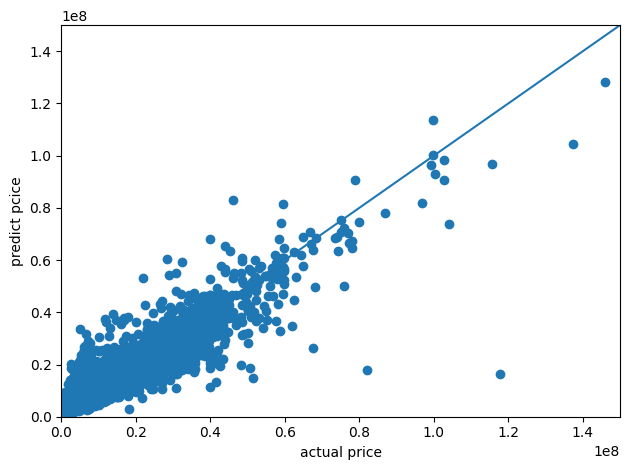

RandomForest RMSE: 5004351.0718632685
RandomForest MAE: 1941599.1342441577


15924.708340071491

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Random Forest Regression (total_price).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

if os.path.exists(Model_path):
    RF_reg = joblib.load(Model_path)
else:
    RF_reg = RandomForestRegressor()
    RF_reg.fit(x_train, y_train)
    # Save Model
    joblib.dump(RF_reg,Model_path)

result = RF_reg.score(x_test, y_test)
y_predict = RF_reg.predict(x_test)


plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 150000000) # x軸的範圍
plt.ylim(0, 150000000) # y軸的範圍
plt.plot([0,150000000], [0,150000000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("Random_Forest_predict_vs_actual (total_price)") # 儲存圖形
plt.show() # 察看結果

RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',dt_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))

average_price_mean = RF_reg_mean/x_test['building_area'].mean()
average_price_mean

Saving figure Gradient_Boost_predict_vs_actual (total_price)


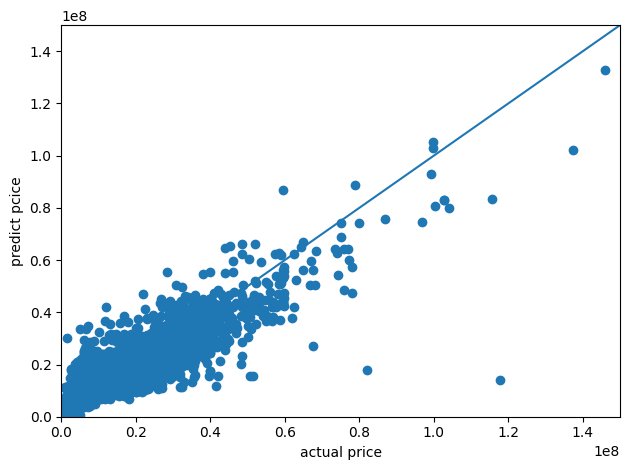

Gradient Boosting Regressor RMSE: 5004351.0718632685
Gradient Boosting Regressor MAE: 2629132.9288631137


21563.758626067687

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Gradient Boosting Regression(total_price).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

if os.path.exists(Model_path):
    GB_reg = joblib.load(Model_path)
else:
    GB_reg = GradientBoostingRegressor()
    GB_reg.fit(x_train, y_train)
    # Save Model
    joblib.dump(GB_reg,Model_path)

result = GB_reg.score(x_test, y_test)
y_predict = GB_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 150000000) # x軸的範圍
plt.ylim(0, 150000000) # y軸的範圍
plt.plot([0,150000000], [0,150000000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("Gradient_Boost_predict_vs_actual (total_price)") # 儲存圖形
plt.show() # 察看結果

GB_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Gradient Boosting Regressor RMSE:',dt_reg_rmse)
GB_reg_mean = np.mean(np.abs(y_test - y_predict))
print("Gradient Boosting Regressor MAE: {}".format(GB_reg_mean))

average_price_mean = GB_reg_mean/x_test['building_area'].mean()
average_price_mean